# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)
import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

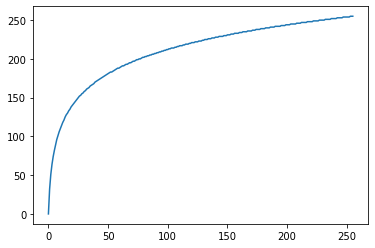

In [39]:
plt.plot(lut.log)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

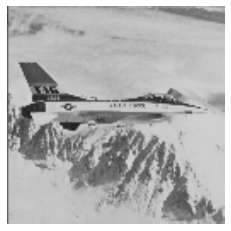

In [35]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

jet = cv2.imread('jet.bmp')
jet = cv2.cvtColor(jet, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(jet)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

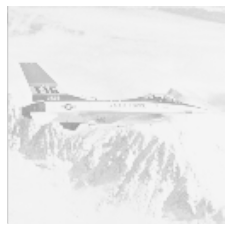

In [38]:
jetLutted = cv2.LUT(jet, lut.log)
plt.axis('off')
plt.imshow(jetLutted)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [66]:
def LUT(img, codingTable, code_type):
  f, (ax1,ax2,ax3) = plt.subplots(1,3)
  ax1.set_title(code_type)
  ax1.plot(codingTable)
  ax1.set_aspect('equal')
  ax2.set_title('oryginał')
  ax2.imshow(img)
  ax2.set_axis_off()
  ax3.set_title('przekształcenie')
  ax3.imshow(cv2.LUT(img, codingTable))
  ax3.set_axis_off()
  plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

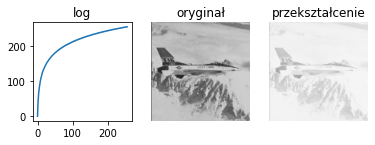

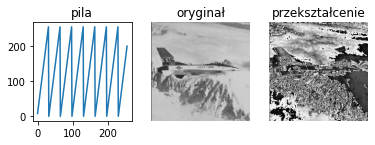

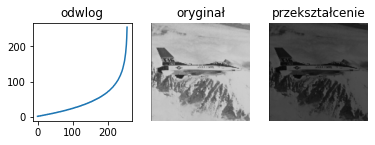

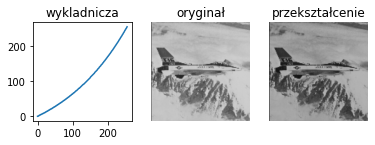

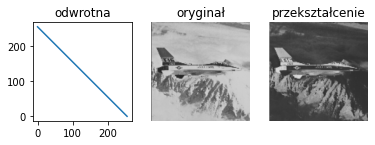

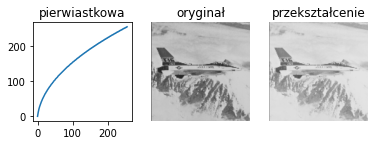

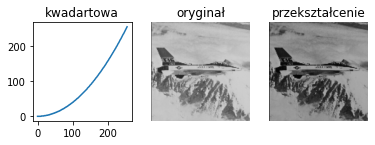

In [67]:
LUT(jet, lut.log, 'log')
LUT(jet, lut.pila, 'pila')
LUT(jet, lut.odwlog, 'odwlog')
LUT(jet, lut.wykladnicza, 'wykladnicza')
LUT(jet, lut.odwrotna, 'odwrotna')
LUT(jet, lut.pierwiastkowa, 'pierwiastkowa')
LUT(jet, lut.kwadratowa, 'kwadartowa')

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

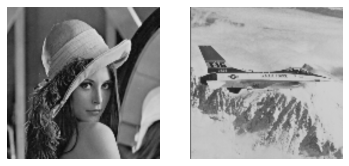

In [11]:
jet = cv2.imread('jet.bmp')
jet = cv2.cvtColor(jet, cv2.COLOR_BGR2RGB)
lena = cv2.imread('lena.bmp')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(lena)
ax1.set_axis_off()
ax2.imshow(jet)
ax2.set_axis_off()
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

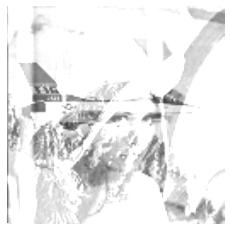

In [40]:
plt.axis('off')
plt.imshow(cv2.add(lena, jet))

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

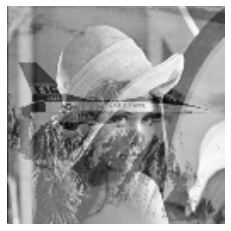

In [41]:
suma = cv2.add(lena.astype('uint16'), jet.astype('uint16'))
plt.axis('off')
plt.imshow(cv2.normalize(suma, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')) 

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

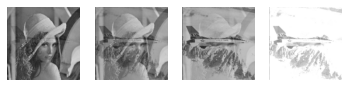

In [34]:
def add_weight(img1, alpha, img2, gamma=0):
  return cv2.addWeighted(img1, alpha, img2, (1 - alpha), gamma)

f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
ax1.imshow(add_weight(img1=jet, alpha=0.2, img2=lena))
ax1.set_axis_off()
ax2.imshow(add_weight(img1=jet, alpha=0.5, img2=lena))
ax2.set_axis_off()
ax3.imshow(add_weight(img1=jet, alpha=0.8, img2=lena))
ax3.set_axis_off()
ax4.imshow(add_weight(img1=jet, alpha=0.8, img2=lena, gamma=100))
ax4.set_axis_off()
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

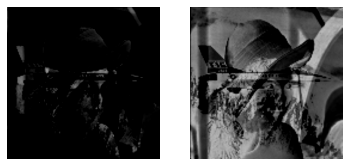

In [45]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(cv2.subtract(lena, jet))
ax1.set_axis_off()
ax2.imshow(cv2.subtract(jet, lena))
ax2.set_axis_off()
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

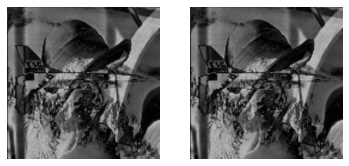

In [58]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(np.abs(cv2.subtract(lena.astype('int16'), jet.astype('int16'))))
ax1.set_axis_off()
ax2.imshow(np.abs(cv2.subtract(jet.astype('int16'), lena.astype('int16'))))
ax2.set_axis_off()
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

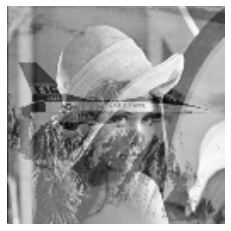

In [60]:
plt.axis('off')
product = cv2.multiply(jet.astype('float64'), lena.astype('float64'))
product = cv2.normalize(suma, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
plt.imshow(product)

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

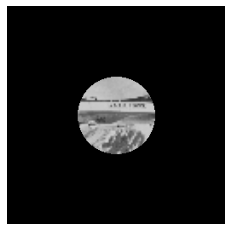

In [77]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

mask = cv2.imread('kolo.bmp').astype('bool').astype('uint8')
plt.axis('off')
plt.imshow(cv2.multiply(jet, mask))

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

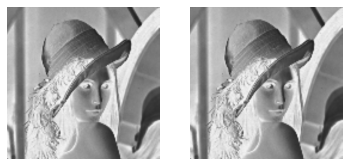

In [71]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(cv2.bitwise_not(lena))
ax1.set_axis_off()
ax2.imshow(cv2.LUT(lena, lut.odwrotna))
ax2.set_axis_off()
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

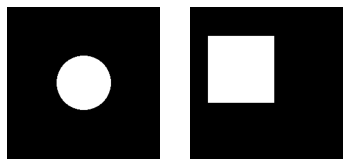

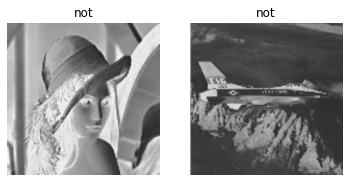

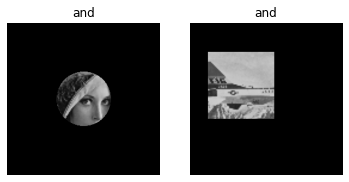

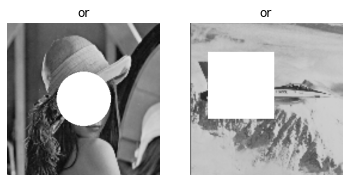

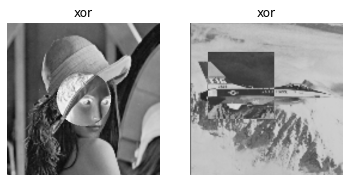

In [83]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

kolo = cv2.imread('kolo.bmp')
kwadrat = cv2.imread('kwadrat.bmp')

f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(kolo)
ax1.set_axis_off()
ax2.imshow(kwadrat)
ax2.set_axis_off()
plt.show()

f, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('not')
ax2.set_title('not')
ax1.imshow(cv2.bitwise_not(lena))
ax1.set_axis_off()
ax2.imshow(cv2.bitwise_not(jet))
ax2.set_axis_off()
plt.show()

f, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('and')
ax2.set_title('and')
ax1.imshow(cv2.bitwise_and(lena, kolo))
ax1.set_axis_off()
ax2.imshow(cv2.bitwise_and(jet, kwadrat))
ax2.set_axis_off()
plt.show()

f, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('or')
ax2.set_title('or')
ax1.imshow(cv2.bitwise_or(lena, kolo))
ax1.set_axis_off()
ax2.imshow(cv2.bitwise_or(jet, kwadrat))
ax2.set_axis_off()
plt.show()

f, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('xor')
ax2.set_title('xor')
ax1.imshow(cv2.bitwise_xor(lena, kolo))
ax1.set_axis_off()
ax2.imshow(cv2.bitwise_xor(jet, kwadrat))
ax2.set_axis_off()
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.